<h1>Introduction to Python Regex Module</h1>
In this notebook, we explore regex module functions and capabilities<br>
https://docs.python.org/3/library/re.html

In [1]:
# import python regex module
import re

<h2>Raw String and Regular String</h2>
Always use Raw string for Regex Patterns

In [5]:
s = "a\tb" # a-tab-b
print(s)

a	b


In [6]:
raw_s = r"a\tb"
print(raw_s)

a\tb


<h2>re.match - Find first match</h2>
Find match at the beginning of a string<br>
Useful for validating input from users

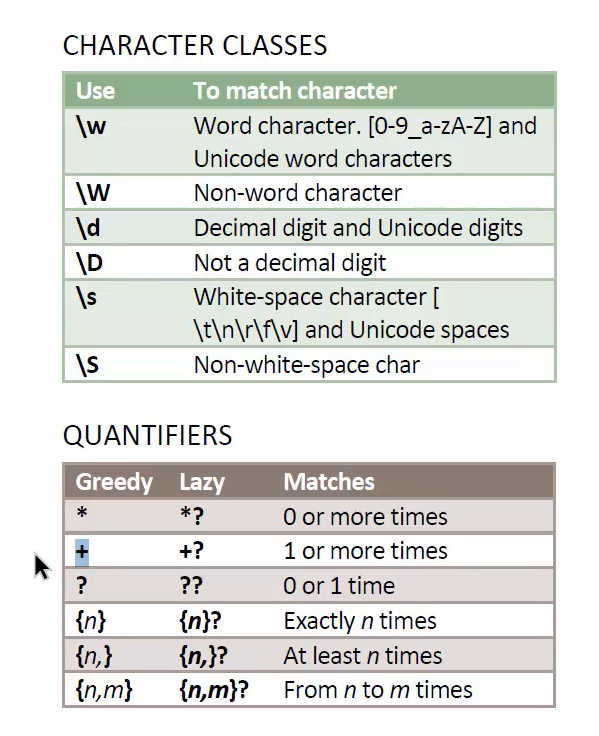

In [8]:
pattern = r"\d+"
text = "42 is my lucky number"

In [10]:
match = re.match(pattern, text)

In [11]:
if match :
    print('match success')
else:
    print('no match')

match success


In [12]:
pattern = r"\d+"
text = " is my lucky number"
match = re.match(pattern, text)

if match :
    print('match success')
else:
    print('no match')

no match


In [14]:
pattern = r"\d+"
text = "42 is my lucky number"

In [15]:
match = re.match(pattern, text)

In [16]:
if match :
    print(match.group(0))
else:
    print('no match')

42


In [17]:
if match :
    print(match.group(0), 'at index:', match.start()) #print the matching text and location
else:
    print('no match')

42 at index: 0


In [19]:
pattern = r"\d+"
text = "my lucky number is 42"
match = re.match(pattern, text)

if match :
    print(match.group(0), 'at index:', match.start()) #print the matching text and location
else:
    print('no match') #it returned no match because : re.match Try to apply the pattern at the start of the string

no match


<h3>input validation</h3>

In [20]:
def is_integer(text):
    pattern = r"\d+"
    
    match = re.match(pattern,text)
    
    if match:
        return True
    else:
        return False

In [21]:
is_integer("abcd")

False

In [22]:
is_integer("123")

True

In [23]:
is_integer("123asd")

True

In [24]:
is_integer("asd123")

False

In [25]:
is_integer("asd123asd")

False

In [26]:
def test_is_integer():
    pass_list = ["123", "456", "900", "0991"]
    fail_list = ["a123","124a", "1 2 3", "1\t2", " 12", "45 "]
    
    for text in pass_list:
        if not is_integer(text):
            print('\tFailed to detect an integer', text)
            
    for text in fail_list:
        if is_integer(text):
            print('\tIncorrectly classified as an integer', text)
    
    print('test complete')

In [28]:
test_is_integer() #they all start with digit

	Incorrectly classified as an integer 124a
	Incorrectly classified as an integer 1 2 3
	Incorrectly classified as an integer 1	2
	Incorrectly classified as an integer 45 
test complete


In [29]:
is_integer("124a")

True

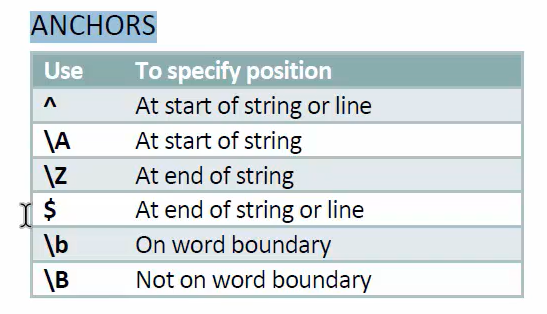

In [30]:
def is_integer(text):
    pattern = r"\d+$" # look for numbers followed by end of string
    
    match = re.match(pattern,text)
    
    if match:
        return True
    else:
        return False

In [31]:
test_is_integer()

test complete


In [38]:
def is_integer(text):
    pattern = r"^\d+$" # this pattern will now match if the entire string is an integer
    
    match = re.match(pattern,text)
    
    if match:
        return True
    else:
        return False

In [39]:
test_is_integer()

test complete


<h2>re.search - Find the first match anywhere</h2>

In [34]:
pattern = r"\d+" #one or more digits
text = "42 is my lucky number"
match = re.match(pattern, text)

if match :
    print(match.group(0), 'at index:', match.start()) #print the matching text and location
else:
    print('no match') 
    

42 at index: 0


In [43]:
pattern = r"\d+" #one or more digits
text = "my lucky number is 42"
match = re.match(pattern, text)  

if match :
    print(match.group(0), 'at index:', match.start()) #print the matching text and location
else:
    print('no match') 
    

no match


In [42]:
pattern = r"\d+" #one or more digits
text = "my lucky number is 42"
match = re.search(pattern, text)  #search method matches

if match :
    print(match.group(0), 'at index:', match.start()) #print the matching text and location
else:
    print('no match') 
    

42 at index: 19


In [45]:
pattern = r"\d+" #one or more digits
text = "my lucky numbers are 42 and 24" 
#However, the search method will find only the first match in the text; so it's not going to find the second number, 24.

match = re.search(pattern, text)  #search method matches

if match :
    print(match.group(0), 'at index:', match.start()) #print the matching text and location
else:
    print('no match') 
    

42 at index: 21


In [47]:
def is_integer(text):
    pattern = r"^\d+$" # ^ = start of string. folllowed by one or more digits. followed by end of string
    
    match = re.search(pattern,text)
    
    if match:
        return True
    else:
        return False

In [49]:
is_integer("abcd")

False

In [50]:
test_is_integer()

test complete


<h4>TODO: Modify is_integer to use search method</h4>

<h2>re.findall - Find all the matches</h2>
method returns only after scanning the entire text

In [51]:
pattern = r"\d+"
text = "NY Postal Coders are 10001, 10002, 10003, 10004"

print('Pattern', pattern)


match = re.findall (pattern, text)

if match:
    print("Found", match)
else:
    print("no match")

Pattern \d+
Found ['10001', '10002', '10003', '10004']


<h2>re.finditer - Iterator</h2>
method returns an iterator with the first match and you have control to ask for more matches

In [52]:
pattern = r"\d+"
text = "NY Postal Codes are 10001, 10002, 10003, 10004"

print ('Pattern', pattern)

match_iter = re.finditer(pattern, text)

print ('Matches')

i = 0

for match in match_iter:
    print('\t', match.group(0), 'at index:', match.start())
    i += 1
    
    if i > 2:
        break


Pattern \d+
Matches
	 10001 at index: 20
	 10002 at index: 27
	 10003 at index: 34


<h2>groups - find sub matches </h2>

In [53]:
pattern = r"\d+"
text = "Start Date: 20200920" # year = 2026, month=09, day=20


match = re.search(pattern, text)

if match:
    print(match.group(0), 'at index:', match.start()) # print the matching text and Location
else:
    print("no match")


20200920 at index: 12


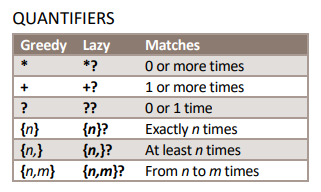

In [55]:
pattern = r"(\d{4})\d{2}\d{2}"
text = "Start Date: 20200920" # year = 2026, month=09, day=20


match = re.search(pattern, text)

if match:
    print(match.group(0), 'at index:', match.start()) # print the matching text and Location
    print('Groups', match.groups())
else:
    print("no match")

# This code now prints the date and in addition, it also captured the year as we wrap the year portion

20200920 at index: 12
Groups ('2020',)


In [56]:
pattern = r"(\d{4})(\d{2})(\d{2})"
text = "Start Date: 20200920" # year = 2026, month=09, day=20


match = re.search(pattern, text)

if match:
    print(match.group(0), 'at index:', match.start()) # print the matching text and Location
    print('Groups', match.groups())
else:
    print("no match")

# This code now prints the date and in addition, it also captured the year as we wrap the year portion

20200920 at index: 12
Groups ('2020', '09', '20')


In [58]:
pattern = r"(\d{4})(\d{2})(\d{2})"
text = "Start Date: 20200920" # year = 2026, month=09, day=20


match = re.search(pattern, text)

if match:
    print(match.group(0), 'at index:', match.start()) # print the matching text and Location
    print('Groups', match.groups())
    
    print("match group 1:",match.group(1))
    print("match group 2:",match.group(2))
    print("match group 3:",match.group(3))


else:
    print("no match")

# This code now prints the date and in addition, it also captured the year as we wrap the year portion

20200920 at index: 12
Groups ('2020', '09', '20')
match group 1: 2020
match group 2: 09
match group 3: 20


In [61]:
pattern = r"(\d{4})(\d{2})(\d{2})"
text = "Start Date: 20200920" # year = 2026, month=09, day=20


match = re.search(pattern, text)

if match:
    print(match.group(0), 'at index:', match.start()) # print the matching text and Location
    print('Groups', match.groups())
    
    for idx, value in enumerate(match.groups()):
        print('\tGroup', idx+1, value, '\tat index', match.start(idx+1))



else:
    print("no match")

# This code now prints the date and in addition, it also captured the year as we wrap the year portion

20200920 at index: 12
Groups ('2020', '09', '20')
	Group 1 2020 	at index 12
	Group 2 09 	at index 16
	Group 3 20 	at index 18


<h3>named groups</h3>

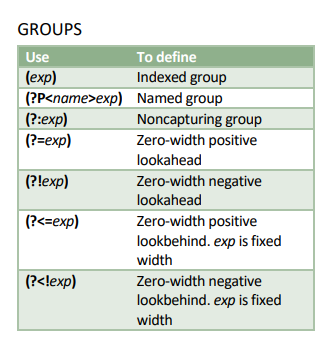

In [66]:

pattern = r"(?P<year>\d{4})(?P<month>\d{2})(?P<day>\d{2})"


text = "Start Date: 20200920" # year = 2026, month=09, day=20


match = re.search(pattern, text)

if match:
    print(match.group(0), 'at index:', match.start()) # print the matching text and Location
    print('\t', match.groupdict())

else:
    print("no match")


20200920 at index: 12
	 {'year': '2020', 'month': '09', 'day': '20'}


<h3>access by group name</h3>

In [68]:

pattern = r"(?P<year>\d{4})(?P<month>\d{2})(?P<day>\d{2})"


text = "Start Date: 20200920" # year = 2026, month=09, day=20


match = re.search(pattern, text)

if match:
    print(match.group(0), 'at index:', match.start()) # print the matching text and Location
    print('\tyear', match.group('year'))
    print('\tmonth', match.group('month'))
    print('\tday', match.group('day'))


else:
    print("no match")


20200920 at index: 12
	year 2020
	month 09
	day 20


<h2>re.sub - find and replace</h2>

<h3>two patterns: one to find the text and another pattern with replacement text</h3>

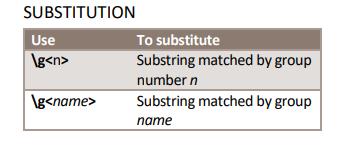

\g to refer to the captured groups in the find pattern.

In [69]:
pattern = r"(?P<year>\d{4})(?P<month>\d{2})(?P<day>\d{2})"
text = "Start Date: 20200920, End Date: 20210920" #20200920 09-20-2020

replacement_pattern = r"\g<month>-\g<day>-\g<year>"

print('original text\t', text)
print()

new_text = re.sub(pattern,replacement_pattern, text)

print('new text\t', new_text)


original text	 Start Date: 20200920, End Date: 20210920

new text	 Start Date: 09-20-2020, End Date: 09-20-2021


<h3>custom function to generate replacement text</h3>

In [70]:
#20200920 => Sep-20-2020
import datetime

def format_date(match):
    in_date = match.groupdict()
    
    year = int(in_date['year'])
    month = int(in_date[ 'month'])
    day = int(in_date[ 'day' ])
    
    return datetime.date(year, month, day).strftime('%b-%d-%Y')


In [72]:
pattern = r"(?P<year>\d{4})(?P<month>\d{2})(?P<day>\d{2})"
text = "Start Date: 20200920, End Date: 20210920" #20200920+> 09-20-2020


print('original text\t', text)
print()

new_text = re.sub(pattern,format_date, text)

print('new text\t', new_text)


original text	 Start Date: 20200920, End Date: 20210920

new text	 Start Date: Sep-20-2020, End Date: Sep-20-2021


<h2>re.split - split text based on specified pattern</h2>

In [73]:
pattern = r","
text = "a-c,x,y,1"

re.split(pattern,text)

['a-c', 'x', 'y', '1']